### Importing libraries

In [1]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split

from sklearn.linear_model import LinearRegression

import statsmodels.api as sm

### Loading dataset

In [3]:
df = pd.read_csv("C:/Users/Naznin Naznin/Machine Learning Notebooks/Advertising.csv")
df.head()

,Unnamed: 0,TV,radio,newspaper,sales
0,1,230.1,37.8,69.2,22.1
1,2,44.5,39.3,45.1,10.4
2,3,17.2,45.9,69.3,9.3
3,4,151.5,41.3,58.5,18.5
4,5,180.8,10.8,58.4,12.9


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Unnamed: 0  200 non-null    int64  
 1   TV          200 non-null    float64
 2   radio       200 non-null    float64
 3   newspaper   200 non-null    float64
 4   sales       200 non-null    float64
dtypes: float64(4), int64(1)
memory usage: 7.9 KB


In [5]:
#we do not require this col, so we'll drop it
df.drop(['Unnamed: 0'], axis = 1, inplace = True)

In [6]:
df.describe()

,TV,radio,newspaper,sales
count,200.000000,200.000000,200.000000,200.000000
mean,147.042500,23.264000,30.554000,14.022500
std,85.854236,14.846809,21.778621,5.217457
min,0.700000,0.000000,0.300000,1.600000
25%,74.375000,9.975000,12.750000,10.375000
50%,149.750000,22.900000,25.750000,12.900000
75%,218.825000,36.525000,45.100000,17.400000
max,296.400000,49.600000,114.000000,27.000000


### Simple Linear Regression

#### Sales v/s TV

In [7]:
X = df['TV']
y = df['sales']

Text(0, 0.5, 'Sales')

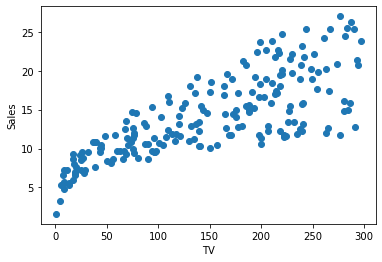

In [8]:
plt.scatter(X, y)
plt.xlabel('TV')
plt.ylabel('Sales')
#we can see a linear relationship between TV and sales variable

### Train-Test Split

In [9]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 8)

### Linear Regression

In [10]:
regressor = LinearRegression()

X_train_arr = np.array(X_train)
y_train_arr = np.array(y_train)
regressor.fit(X_train_arr.reshape(-1, 1), y_train_arr.reshape(-1, 1))

LinearRegression()

In [11]:
regressor.intercept_

array([6.93629554])

In [12]:
regressor.coef_

array([[0.04781615]])

In [13]:
y_pred = regressor.predict(np.array(X_test).reshape(-1, 1))

### Model Evaluation

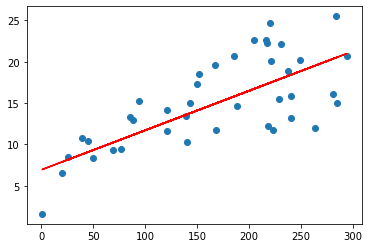

In [14]:
plt.scatter(X_test, y_test)
plt.plot(X_test, y_pred, color = 'r')

In [15]:
X = sm.add_constant(X)

#fit linear regression model
model = sm.OLS(y, X).fit()
  
#display model summary
print(model.summary())
  
# residual sum of squares
print(model.ssr)

                            OLS Regression Results                            
Dep. Variable:                  sales   R-squared:                       0.612
Model:                            OLS   Adj. R-squared:                  0.610
Method:                 Least Squares   F-statistic:                     312.1
Date:                Thu, 27 Apr 2023   Prob (F-statistic):           1.47e-42
Time:                        22:39:41   Log-Likelihood:                -519.05
No. Observations:                 200   AIC:                             1042.
Df Residuals:                     198   BIC:                             1049.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          7.0326      0.458     15.360      0.0

#### RSS = 2102.5305831313512